# 🕰️ ALL ABOUT DURATIONS AND SEGMENTATION IN THE PYSCENE DATA 🕰️

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns


In [4]:
df= pd.read_csv("../output/scenes_data.tsv", sep='\t')

In [5]:
df["season"] = df["episode"].str.extract(r's(\d+)', expand=False).astype(int)
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
mean_duration = df.groupby("episode_short", as_index=False)["duration"].mean()


# AVERAGE DURATION 🕰️ OF SEGMENTS PER EPISODES

/tmp/ipykernel_8030/3446811800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_duration, x="episode_short", y="duration", palette="viridis")


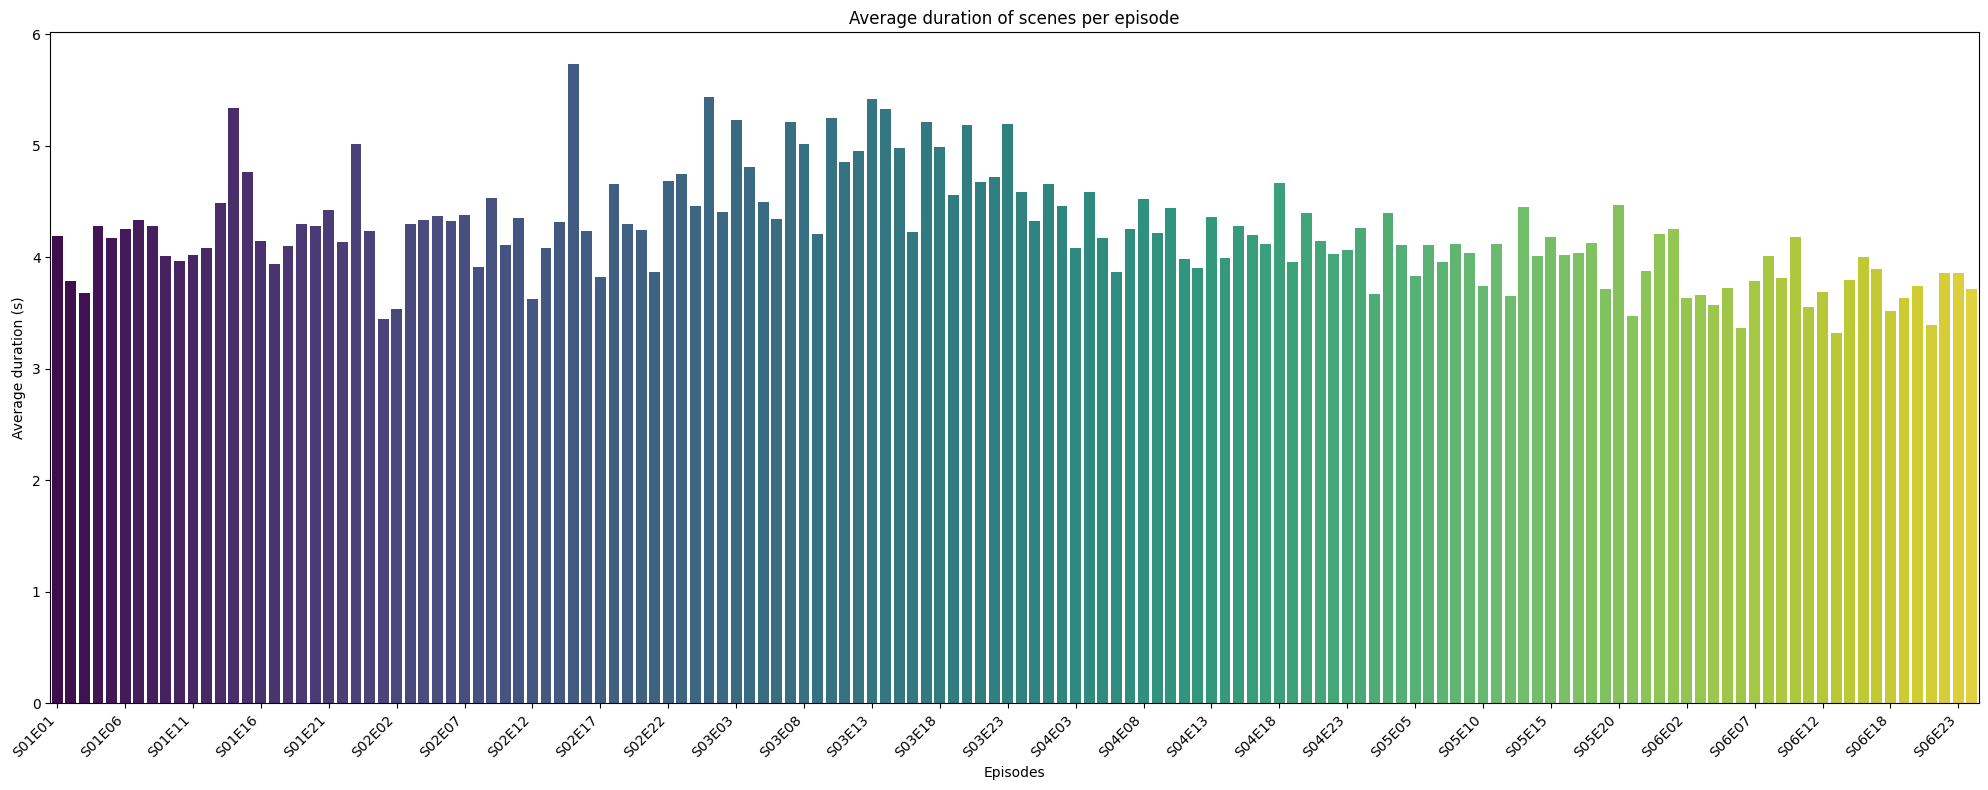

In [6]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=mean_duration, x="episode_short", y="duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of scenes per episode")
plt.ylabel("Average duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


In [7]:

scene_count = df.groupby("episode_short")["scene_number"].count().reset_index(name="num_scenes")

# NUMBER OF SCENES 🧩 IN EPISODES

/tmp/ipykernel_8030/441019428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=scene_count, x="episode_short", y="num_scenes", palette="viridis")


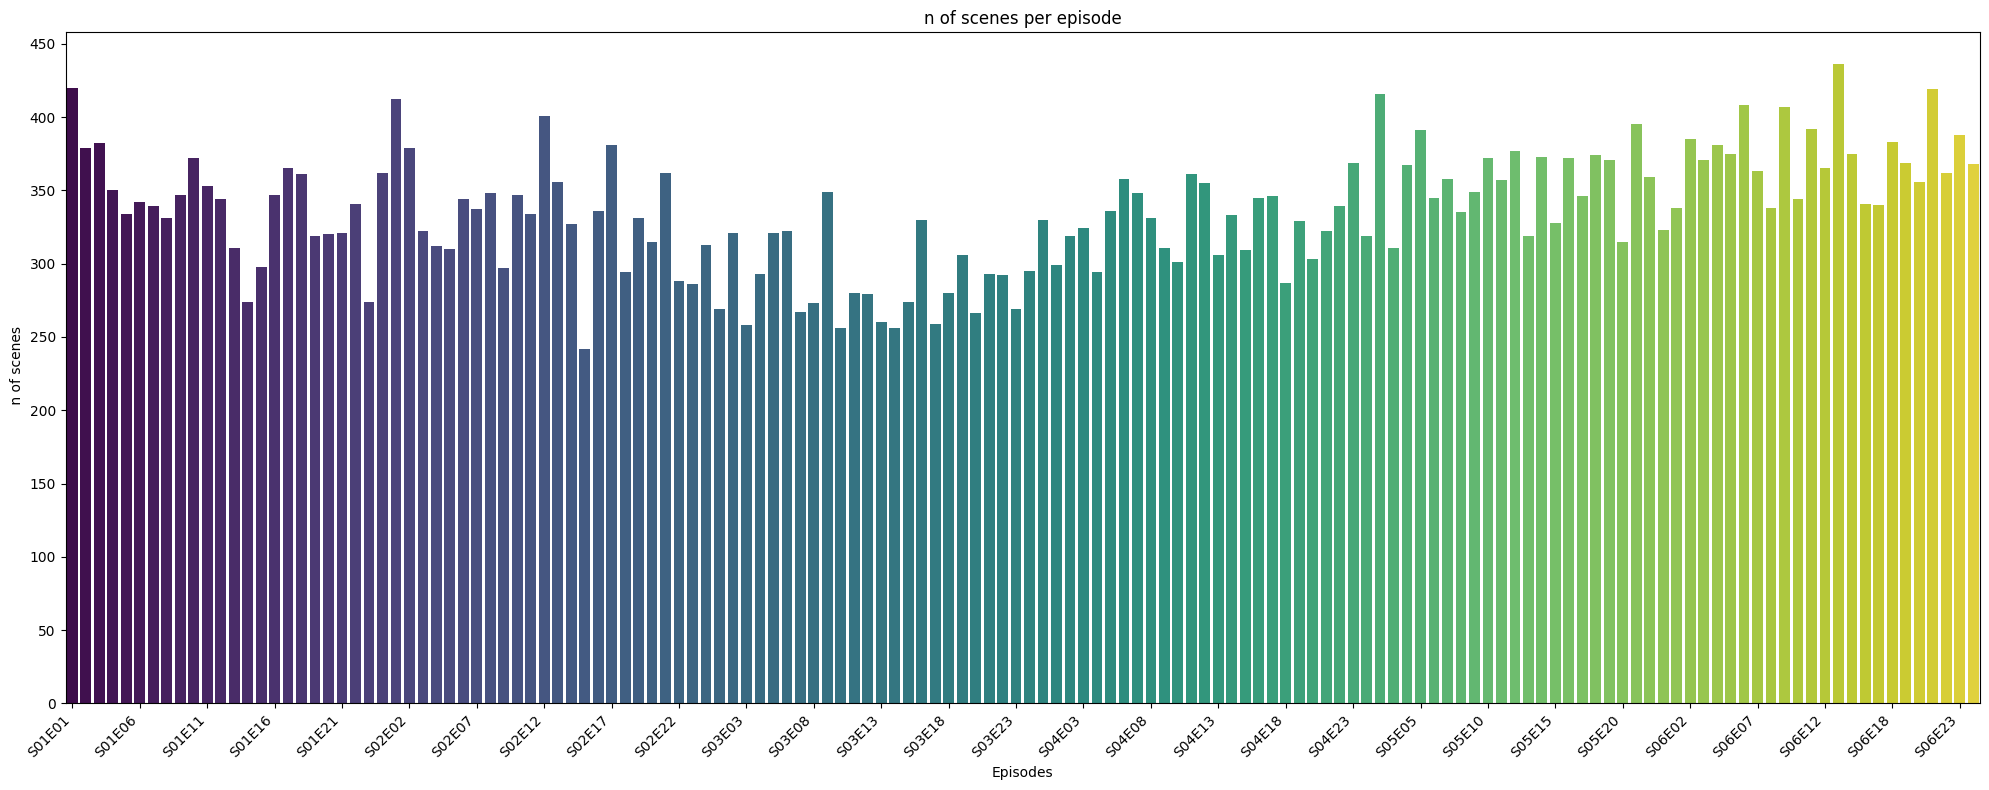

In [8]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=scene_count, x="episode_short", y="num_scenes", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticks(range(0, 500, 50)) 
plt.title("n of scenes per episode")
plt.ylabel(" n of scenes")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()

In [9]:
episode_durations = df.groupby("episode_short")["duration"].sum().reset_index(name="episode_duration")

# DURATION OF EPISODES 🕰️

/tmp/ipykernel_8030/1315073239.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=episode_durations, x="episode_short", y="episode_duration", palette="viridis")


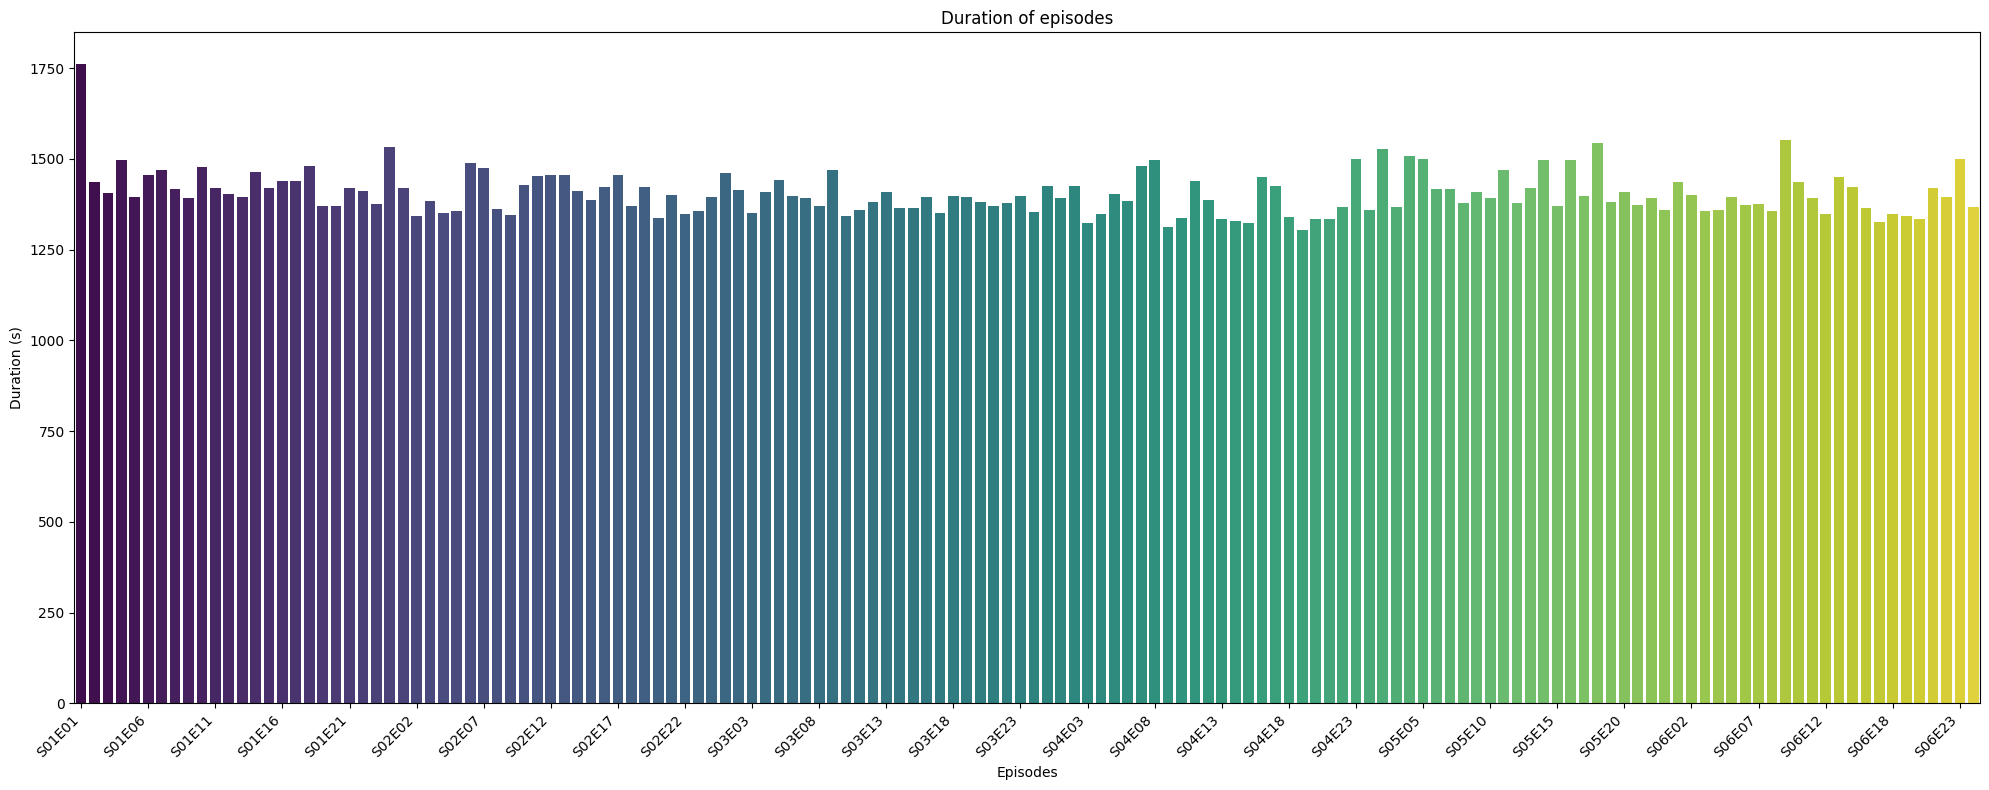

In [10]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=episode_durations, x="episode_short", y="episode_duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Duration of episodes")
plt.ylabel("Duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


# SCENES DURATIONS 🕰️

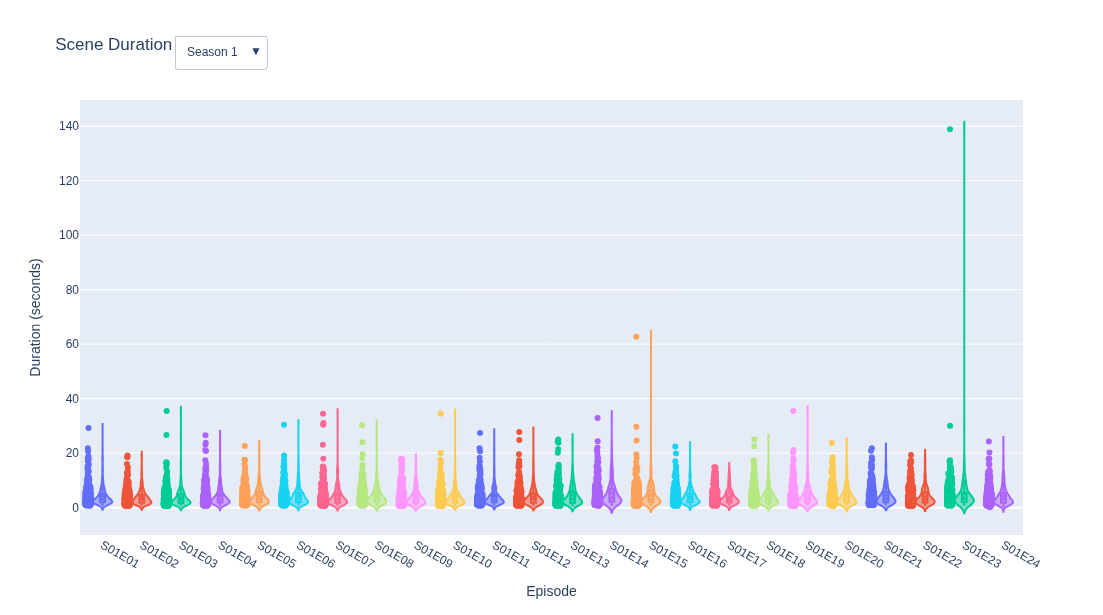

In [11]:
import pandas as pd
import plotly.graph_objects as go

# Sort seasons
seasons = sorted(df['season'].unique())

# Create figure
fig = go.Figure()
all_traces = []

# Track how many episodes per season (for visibility masks)
season_trace_counts = []

# Create violin traces for each season's episodes
for season in seasons:
    filtered_df = df[df['season'] == season]
    episodes = sorted(filtered_df['episode_short'].unique())
    trace_count = 0
    
    for ep in episodes:
        ep_df = filtered_df[filtered_df['episode_short'] == ep]

        trace = go.Violin(
            x=[ep] * len(ep_df),
            y=ep_df['duration'],
            name=f"Ep {ep}",
            box_visible=True,
            meanline_visible=True,
            points="all",
            visible=(season == seasons[0]),  # Only show first season initially
            customdata=ep_df[['global_scene_number', 'duration']].values,
            hovertemplate=(
                "Episode: %{x}<br>" +
                "Global scene: %{customdata[0]}<br>" +
                "Duration: %{customdata[1]} seconds<br>" +
                "<extra></extra>"  # hides the trace name in the tooltip
    )
)
        fig.add_trace(trace)
        trace_count += 1

    season_trace_counts.append(trace_count)

# Compute visibility masks for each season
# Compute visibility masks for each season
visibility_masks = []
total_traces = sum(season_trace_counts)
start = 0
for count in season_trace_counts:
    mask = [False] * total_traces
    for i in range(count):
        mask[start + i] = True
    visibility_masks.append(mask)
    start += count


# Create dropdown buttons
dropdown_buttons = [
    dict(
        label=f"Season {season}",
        method="update",
        args=[
            {"visible": visibility_masks[i]},
            {"title": f"Scene Duration – Season {season}"}
        ]
    )
    for i, season in enumerate(seasons)
]

# Update layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.1,
            y=1.15,
            xanchor="left",
            yanchor="top"
        )
    ],
    title=f"Scene Duration – Season {seasons[0]}",
    xaxis_title="Episode",
    yaxis_title="Duration (seconds)",
    width=1200,
    height=600,
    showlegend=False
)

fig.show()


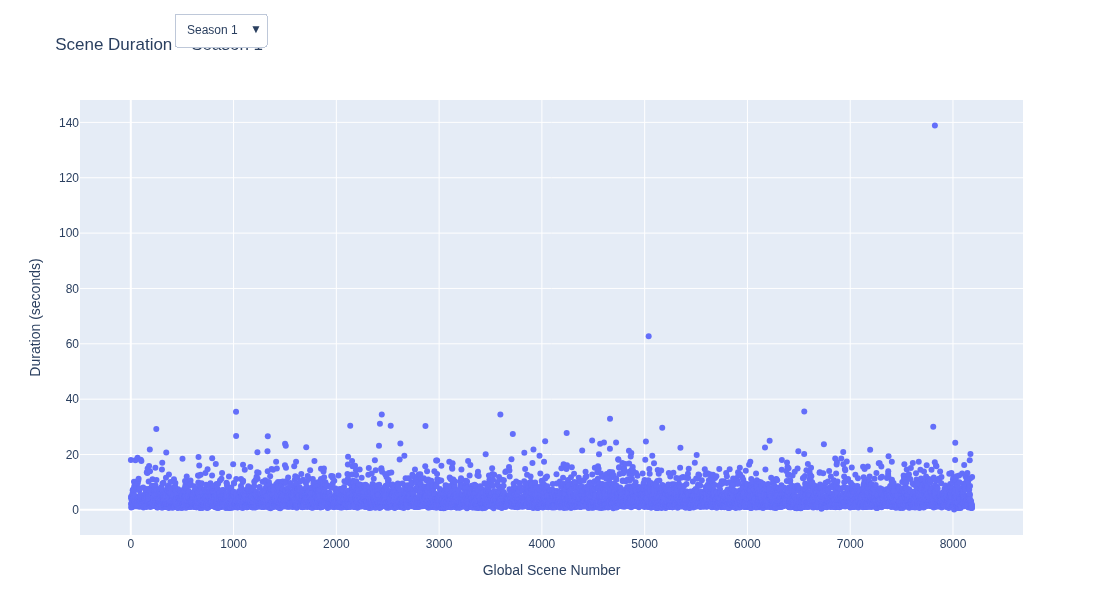

In [13]:
import pandas as pd
import plotly.graph_objects as go

# Sort seasons
seasons = sorted(df['season'].unique())

# Create figure
fig = go.Figure()
season_trace_count = []

# Add one scatter trace per season
for i, season in enumerate(seasons):
    filtered_df = df[df['season'] == season]

    trace = go.Scatter(
        x=filtered_df['global_scene_number'],
        y=filtered_df['duration'],
        mode='markers',
        name=f"Season {season}",
        customdata=filtered_df[['episode_short', 'scene_number']],
        hovertemplate=(
            "Global Scene: %{x}<br>" +
            "Duration: %{y} seconds<br>" +
            "Episode: %{customdata[0]}<br>" +
            "Scene: %{customdata[1]}<br>" +
            "<extra></extra>"
        ),
        visible=(i == 0)  # Only show first season initially
    )
    fig.add_trace(trace)

# Create visibility masks for dropdown
visibility_masks = [
    [i == j for i in range(len(seasons))]
    for j in range(len(seasons))
]

# Create dropdown buttons
dropdown_buttons = [
    dict(
        label=f"Season {season}",
        method="update",
        args=[
            {"visible": visibility_masks[i]},
            {"title": f"Scene Duration – Season {season}"}
        ]
    )
    for i, season in enumerate(seasons)
]

# Update layout
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=dropdown_buttons,
            x=0.1,
            y=1.2,
            xanchor="left",
            yanchor="top"
        )
    ],
    title=f"Scene Duration – Season {seasons[0]}",
    xaxis_title="Global Scene Number",
    yaxis_title="Duration (seconds)",
    width=1200,
    height=600
)

fig.show()
